# Zindi: Call Volume Prediction


Starting Code:
https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/
but it was a bit lmited to just predicting the next value
Next I used:
https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
https://pythondata.com/forecasting-time-series-data-with-prophet-part-1/

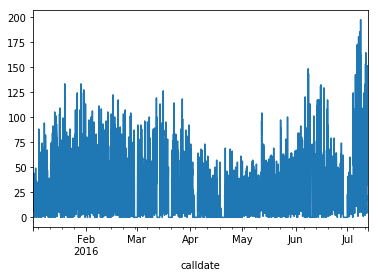

                   ds   y
0 2016-01-01 07:00:00   8
1 2016-01-01 08:00:00  41
2 2016-01-01 09:00:00  20
3 2016-01-01 10:00:00  34
4 2016-01-01 11:00:00  44


In [3]:
from pandas import Series
from matplotlib import pyplot
calldata = Series.from_csv('train.csv', header=0)
calldata_per_hour=calldata.resample('h').count()
calldata_per_hour.plot()
pyplot.show()
calldata_per_hour = calldata_per_hour.to_frame().reset_index()
calldata_per_hour.columns = ['ds', 'y']
print(calldata_per_hour.head())

In [7]:
from fbprophet import Prophet
# Make the prophet model and fit on the data
model = Prophet(changepoint_prior_scale=0.15)
model.fit(calldata_per_hour)
future_data = model.make_future_dataframe(periods=6)
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
4650,2016-07-14 23:00:00,49.136249,20.813243,76.949634
4651,2016-07-15 23:00:00,47.345241,17.694597,77.227456
4652,2016-07-16 23:00:00,43.882275,12.569125,72.382496
4653,2016-07-17 23:00:00,42.982317,15.530651,73.893080
4654,2016-07-18 23:00:00,52.401617,25.258734,81.206238


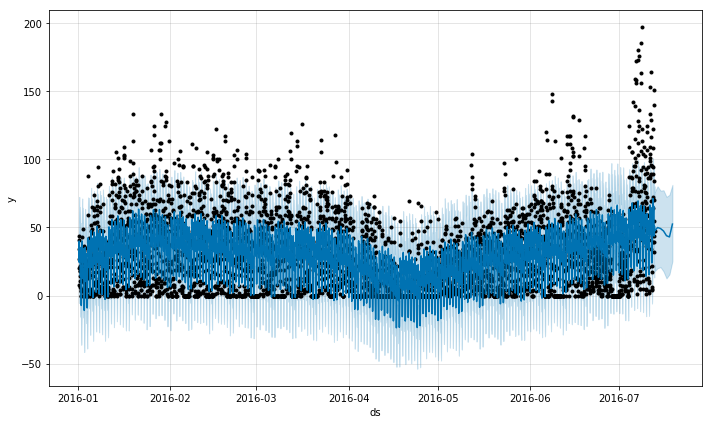

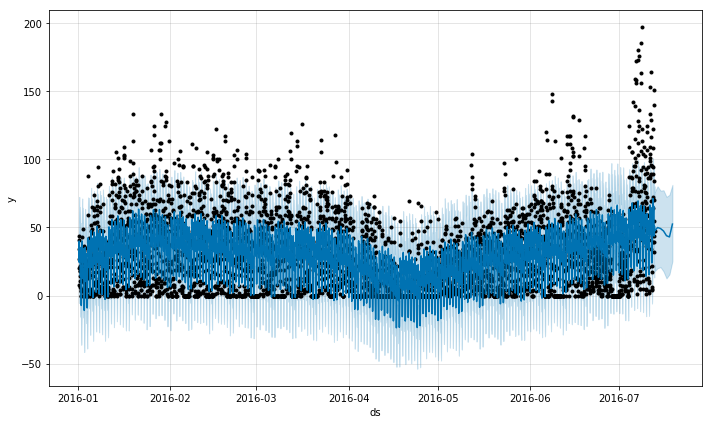

In [8]:
model.plot(forecast_data)

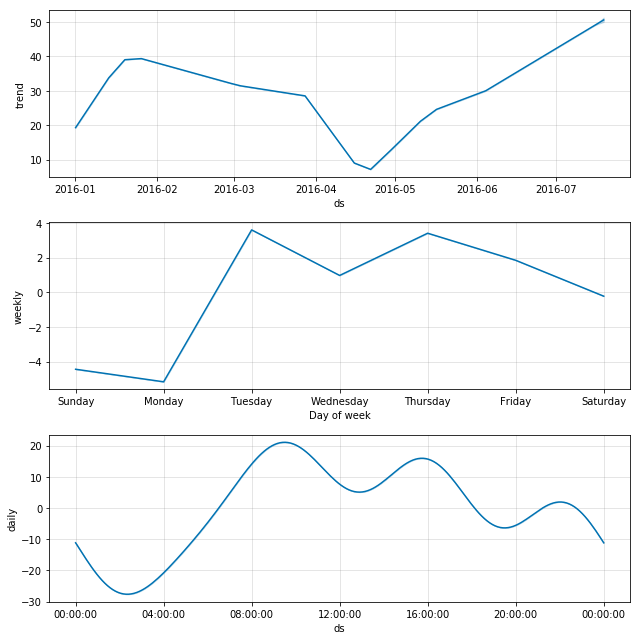

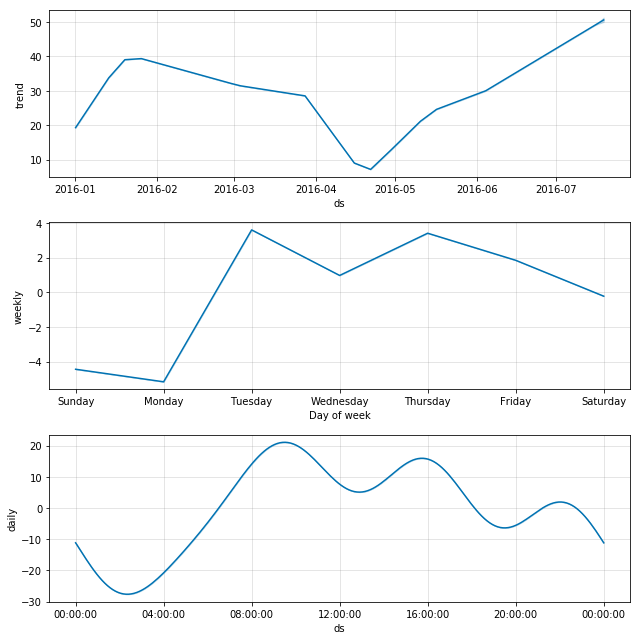

In [9]:
model.plot_components(forecast_data)